<a href="https://colab.research.google.com/github/TimeKP/AI-study-contents/blob/main/wrangling_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np

In [6]:
df_5nm = pd.read_csv('/content/drive/MyDrive/AI_bootcamp/Section2-Machine Learning/Project/df with every factor/5nm')
df_10nm = pd.read_csv('/content/drive/MyDrive/AI_bootcamp/Section2-Machine Learning/Project/df with every factor/10nm')
df_20nm = pd.read_csv('/content/drive/MyDrive/AI_bootcamp/Section2-Machine Learning/Project/df with every factor/20nm')

In [7]:
df_5nm.drop('Unnamed: 0', axis = 1, inplace = True)
df_10nm.drop('Unnamed: 0', axis = 1, inplace = True)
df_20nm.drop('Unnamed: 0', axis = 1, inplace = True)

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline

#f, axes = plt.subplots(3, 2, figsize=(8, 6), sharex=True)
#fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(16,12))
def Displot(df):
  sns.displot(df['Vg'],kde=True)
  sns.displot(df['Temp'],kde=True)
  sns.displot(df['height'],kde=True)
  sns.displot(df['width'],kde=True)
  sns.displot(df['100'],kde=True)
  sns.displot(df['200'],kde=True)
  sns.displot(df['500'],kde=True);
  sns.displot(df['1000'],kde=True);

#plt.show()

  fig_path = '/content/drive/MyDrive/AI_bootcamp/Section2-Machine Learning/Project/image'
  plt.savefig(fig_path + '/20nm_displot_features.png', bbox_inches='tight')

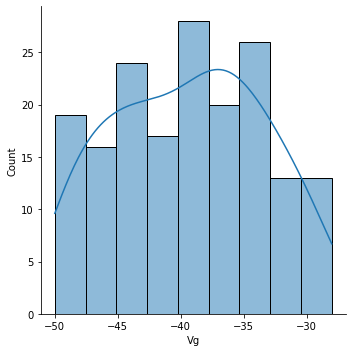

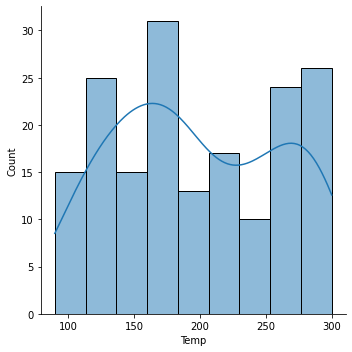

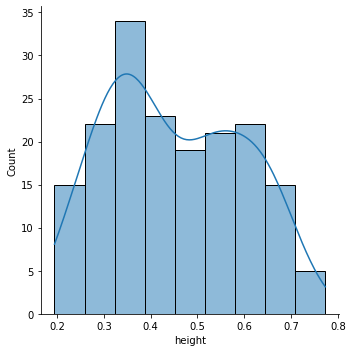

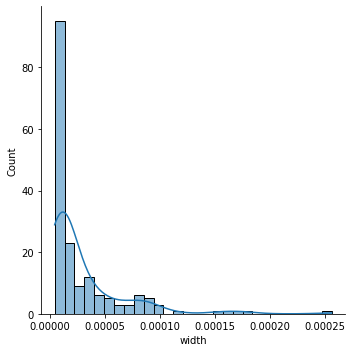

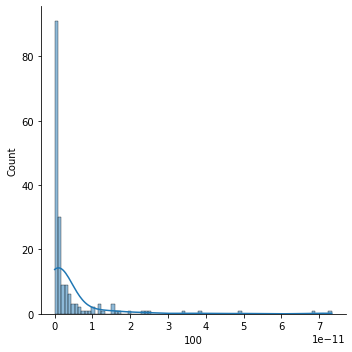

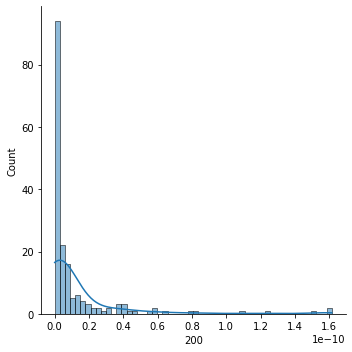

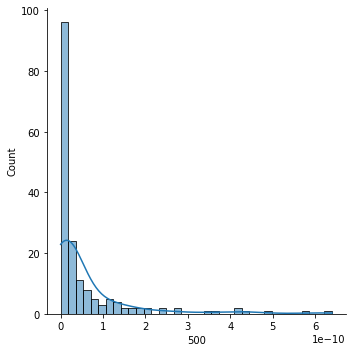

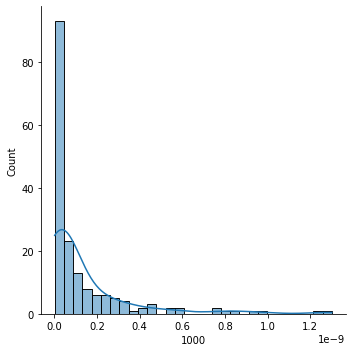

In [121]:
Displot(df_20nm)

In [122]:
df_20nm.head()

,Vg,Temp,0,20,40,60,80,100,120,140,...,880,900,920,940,960,980,1000,Vds,width,height
0,-50,90,2.613001e-17,6.353694e-14,5.367660e-14,1.618930e-14,2.942292e-13,2.669839e-13,1.411662e-13,1.038448e-13,...,2.975496e-11,3.054775e-11,3.133671e-11,3.353053e-11,3.488257e-11,3.787651e-11,3.849160e-11,high,0.000097,0.194705
1,-50,105,2.811053e-17,1.840953e-13,4.709618e-14,4.051385e-14,1.586130e-14,3.010293e-13,4.584870e-13,8.338280e-13,...,8.127324e-11,8.497380e-11,8.771260e-11,9.124652e-11,9.782284e-11,9.704428e-11,1.005005e-10,low,0.000017,0.256842
2,-50,120,1.878294e-17,1.172707e-13,2.284855e-13,5.081765e-13,6.548843e-13,1.457892e-12,1.985328e-12,3.026689e-12,...,1.892698e-10,1.995893e-10,2.018261e-10,2.121708e-10,2.198880e-10,2.273472e-10,2.307617e-10,low,0.000015,0.277619
3,-50,135,5.685993e-18,6.377549e-13,1.416110e-12,2.502685e-12,4.051417e-12,5.913706e-12,8.264745e-12,1.092477e-11,...,3.863403e-10,3.987298e-10,4.112893e-10,4.189347e-10,4.367803e-10,4.391027e-10,4.530067e-10,low,0.000016,0.291386
4,-50,150,1.597189e-17,1.519884e-12,4.028117e-12,7.046869e-12,1.108677e-11,1.577890e-11,2.166774e-11,2.946289e-11,...,6.912350e-10,7.018379e-10,7.168977e-10,7.403847e-10,7.533409e-10,7.600196e-10,7.786378e-10,low,0.000015,0.311429


In [ ]:
df_20nm.info()

In [9]:
def norm(df) :
  log_norm_col = np.array(df.columns[2:-3])

#df.apply(lambda x:np.square(x) if (x.name+1)%2==0 else x,axis=1)
#df.apply(lambda x:np.square(x) if x.name in ['A','B'] else x)
#df.apply(lambda x:(np.square(x['A']),np.log(x['B']),x['C']) if x['B']>0 else x, axis=1)

  df = df.apply(lambda x: np.log(x) if x.name in log_norm_col else x)
  df = df.apply(lambda x: np.log(x) if x.name in ['width'] else x)

  return df

In [10]:
df_5nm = norm(df_5nm)
df_10nm = norm(df_10nm)
df_20nm = norm(df_20nm)

In [11]:
df_5nm.head()

,Vg,Temp,0,20,40,60,80,100,120,140,...,880,900,920,940,960,980,1000,Vds,width,height
0,-50,135,-40.483849,-29.257631,-29.762514,-31.264546,-28.858061,-29.680155,-32.110227,-30.007721,...,-27.769311,-27.726979,-27.606221,-27.878831,-27.627109,-27.647776,-27.446093,high,-9.633681,0.330513
1,-50,165,-41.403309,-29.666650,-29.826128,-31.541835,-29.392214,-29.274221,-28.796781,-29.238431,...,-26.843532,-26.767117,-26.681805,-26.692213,-26.625834,-26.617814,-26.534834,high,-9.677795,0.384905
2,-50,180,-40.233238,-29.222888,-28.971110,-29.611839,-29.328354,-28.958498,-28.445755,-28.219784,...,-26.313152,-26.303737,-26.213581,-26.279764,-26.161870,-26.146214,-26.115744,high,-9.726909,0.411578
3,-50,195,-41.364394,-29.249788,-29.408114,-28.732639,-28.074753,-27.779536,-28.140130,-28.052976,...,-25.896028,-25.851092,-25.837892,-25.785595,-25.753994,-25.694619,-25.692559,high,-9.803874,0.438921
4,-50,210,-41.364394,-28.137112,-28.183615,-27.540241,-27.229142,-27.244434,-27.053726,-27.289754,...,-25.448237,-25.402595,-25.386350,-25.337953,-25.282250,-25.248017,-25.233035,high,-9.656042,0.458317


In [12]:
df_5nm['thickness'] = 5
df_10nm['thickness'] = 10
df_20nm['thickness'] = 20

In [156]:
df_5nm.to_csv('5nm_wrangling')
df_10nm.to_csv('10nm_wrangling')
df_20nm.to_csv('20nm_wrangling')

In [161]:
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline

#f, axes = plt.subplots(3, 2, figsize=(8, 6), sharex=True)
#fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(16,12))
def Displot_norm(df):
  sns.displot(df['Vg'],kde=True)
  sns.displot(df['Temp'],kde=True)
  sns.displot(df['height'],kde=True)
  sns.displot(df['width'],kde=True)
  sns.displot(df['100'],kde=True)
  sns.displot(df['200'],kde=True)
  sns.displot(df['500'],kde=True);
  sns.displot(df['1000'],kde=True);

#plt.show()

  fig_path = '/content/drive/MyDrive/AI_bootcamp/Section2-Machine Learning/Project/image'
  plt.savefig(fig_path + '/displot_features_after_log_norm.png', bbox_inches='tight')

In [ ]:
Displot_norm(df_20nm)



---



In [13]:
df_5nm.head()

,Vg,Temp,0,20,40,60,80,100,120,140,...,900,920,940,960,980,1000,Vds,width,height,thickness
0,-50,135,-40.483849,-29.257631,-29.762514,-31.264546,-28.858061,-29.680155,-32.110227,-30.007721,...,-27.726979,-27.606221,-27.878831,-27.627109,-27.647776,-27.446093,high,-9.633681,0.330513,5
1,-50,165,-41.403309,-29.666650,-29.826128,-31.541835,-29.392214,-29.274221,-28.796781,-29.238431,...,-26.767117,-26.681805,-26.692213,-26.625834,-26.617814,-26.534834,high,-9.677795,0.384905,5
2,-50,180,-40.233238,-29.222888,-28.971110,-29.611839,-29.328354,-28.958498,-28.445755,-28.219784,...,-26.303737,-26.213581,-26.279764,-26.161870,-26.146214,-26.115744,high,-9.726909,0.411578,5
3,-50,195,-41.364394,-29.249788,-29.408114,-28.732639,-28.074753,-27.779536,-28.140130,-28.052976,...,-25.851092,-25.837892,-25.785595,-25.753994,-25.694619,-25.692559,high,-9.803874,0.438921,5
4,-50,210,-41.364394,-28.137112,-28.183615,-27.540241,-27.229142,-27.244434,-27.053726,-27.289754,...,-25.402595,-25.386350,-25.337953,-25.282250,-25.248017,-25.233035,high,-9.656042,0.458317,5


In [62]:
from sklearn.model_selection import train_test_split

def split_data(df):

  test_size = int(len(df)*0.2)
  valid_size = int(len(df)*0.8*0.2)
#  print(test_size, valid_size)

  array1 = df.index
  test_index = np.random.choice(array1, test_size, replace=False)
#  print(test_index)

  array2 = [x for x in array1 if x not in test_index]
#  print(array2)
  valid_index = np.random.choice(array2, valid_size, replace=False)
#  print(valid_index)

  train_index = list(set(array2) - set(valid_index))
#  print(train_index)

  train = df.iloc[train_index]
  valid = df.iloc[valid_index]
  test = df.iloc[test_index]
  
  return train, valid, test

In [63]:
train_5nm, valid_5nm, test_5nm = split_data(df_5nm)
train_10nm, valid_10nm, test_10nm = split_data(df_10nm)
train_20nm, valid_20nm, test_20nm = split_data(df_20nm)

In [64]:
print(train_5nm.shape, valid_5nm.shape, test_5nm.shape)
print(train_10nm.shape, valid_10nm.shape, test_10nm.shape)
print(train_20nm.shape, valid_20nm.shape, test_20nm.shape)

(57, 57) (14, 57) (17, 57)
(25, 56) (5, 56) (7, 56)
(113, 57) (28, 57) (35, 57)


In [65]:
# Melting
def melting(df) :

  id_vars = ['Vg', 'Temp', 'Vds', 'width', 'height', 'thickness']
  df = pd.melt(frame = df, id_vars = id_vars, var_name = 'Vds_value', value_name = 'Ids')
  df['Vds_value'] = df['Vds_value'].apply(pd.to_numeric, errors='coerce')

  return df

In [66]:
train_5nm = melting(train_5nm)
train_10nm = melting(train_10nm)
train_20nm = melting(train_20nm)

valid_5nm = melting(valid_5nm)
valid_10nm = melting(valid_10nm)
valid_20nm = melting(valid_20nm)

test_5nm = melting(test_5nm)
test_10nm = melting(test_10nm)
test_20nm = melting(test_20nm)

In [67]:
def divide_data(df) :
  y = df['Ids']
  X = df.drop(['Ids'], axis = 1)
  return X, y

In [ ]:
valid_10nm.head()

In [68]:
X_train_5nm, y_train_5nm = divide_data(train_5nm)
X_train_10nm, y_train_10nm = divide_data(train_10nm)
X_train_20nm, y_train_20nm = divide_data(train_20nm)

X_valid_5nm, y_valid_5nm = divide_data(valid_5nm)
X_valid_10nm, y_valid_10nm = divide_data(valid_10nm)
X_valid_20nm, y_valid_20nm = divide_data(valid_20nm)

X_test_5nm, y_test_5nm = divide_data(test_5nm)
X_test_10nm, y_test_10nm = divide_data(test_10nm)
X_test_20nm, y_test_20nm = divide_data(test_20nm)

In [69]:
print(X_train_5nm.shape, X_valid_5nm.shape, X_test_5nm.shape, y_train_5nm.shape, y_valid_5nm.shape, y_test_5nm.shape)
print(X_train_10nm.shape, X_valid_10nm.shape, X_test_10nm.shape, y_train_10nm.shape, y_valid_10nm.shape, y_test_10nm.shape)
print(X_train_20nm.shape, X_valid_20nm.shape, X_test_20nm.shape, y_train_20nm.shape, y_valid_20nm.shape, y_test_20nm.shape)

(2907, 7) (714, 7) (867, 7) (2907,) (714,) (867,)
(1250, 7) (250, 7) (350, 7) (1250,) (250,) (350,)
(5763, 7) (1428, 7) (1785, 7) (5763,) (1428,) (1785,)


In [58]:
X_train_5nm.head()

,Vg,Temp,Vds,width,height,thickness,Vds_value
0,-50,135,high,-9.633681,0.330513,5,0
1,-50,165,high,-9.677795,0.384905,5,0
2,-50,180,high,-9.726909,0.411578,5,0
3,-50,210,high,-9.656042,0.458317,5,0
4,-50,240,high,-9.706620,0.509304,5,0


In [277]:
X_train = pd.concat([X_train_5nm, X_train_10nm, X_train_20nm], ignore_index = True)
X_valid = pd.concat([X_valid_5nm, X_valid_10nm, X_valid_20nm], ignore_index = True)
X_test = pd.concat([X_test_5nm, X_test_10nm, X_test_20nm], ignore_index = True)

y_train = pd.concat([y_train_5nm, y_train_10nm, y_train_20nm], ignore_index = True)
y_valid = pd.concat([y_valid_5nm, y_valid_10nm, y_valid_20nm], ignore_index = True)
y_test = pd.concat([y_test_5nm, y_test_10nm, y_test_20nm], ignore_index = True)

In [278]:
print(X_train.shape, X_valid.shape, X_test.shape, y_train.shape, y_valid.shape, y_test.shape)

(9920, 7) (2392, 7) (3002, 7) (9920,) (2392,) (3002,)


In [279]:
train_5nm.head()

,Vg,Temp,Vds,width,height,thickness,Vds_value,Ids
0,-50,135,high,-9.633681,0.330513,5,0,-40.483849
1,-50,165,high,-9.677795,0.384905,5,0,-41.403309
2,-50,180,high,-9.726909,0.411578,5,0,-40.233238
3,-50,225,high,-9.708529,0.484471,5,0,-40.641169
4,-50,240,high,-9.706620,0.509304,5,0,-40.604802


In [280]:
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np

def calculate_baseline_score(Ser):
    mae = float("inf")
    r2 = -1

    y = Ser
    y_pred_base = pd.Series(index = range(0, len(y)))

    y_pred_base.fillna(y.mean(), inplace = True)
    
    mae = mean_absolute_error(y, y_pred_base)
    r2 = r2_score(y, y_pred_base)

    return mae, r2

In [281]:
print(len(y_train)+len(y_valid)+len(y_test))
for_base = pd.concat([y_train, y_valid, y_test], ignore_index = True)
base_mae, base_r2 = calculate_baseline_score(for_base)

15314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if __name__ == '__main__':


In [282]:
print(f"MAE: {base_mae:.2f}, R^2: {base_r2:.2f}")

MAE: 2.25, R^2: 0.00


In [ ]:
!pip install --upgrade category_encoders

In [283]:
from scipy.stats import randint, uniform
from category_encoders import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

In [284]:
pipe = make_pipeline(
    OneHotEncoder(), 
    SimpleImputer(),
    XGBRegressor()
)

dists = {
    'xgbregressor__n_estimators': [100, 400, 800],
    'xgbregressor__max_depth': [3, 6, 9],
    'xgbregressor__learning_rate': [0.05, 0.1, 0.20],
    'xgbregressor__min_child_weight': [1, 10, 100]
}

clf = RandomizedSearchCV(
    pipe, 
    param_distributions = dists, 
    n_iter = 50, 
    cv = 3, 
    scoring = 'neg_mean_absolute_error',  
    verbose = 1,
    n_jobs = -1,
    random_state = 42
)

#clf.get_params().keys()

clf.fit(X_train, y_train);

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[03:20:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [285]:
print('최적 하이퍼파라미터: ', clf.best_params_)
print('MAE: ', -clf.best_score_)

최적 하이퍼파라미터:  {'xgbregressor__n_estimators': 800, 'xgbregressor__min_child_weight': 1, 'xgbregressor__max_depth': 3, 'xgbregressor__learning_rate': 0.2}
MAE:  1.661244545991753


In [286]:
pipe = clf.best_estimator_

In [291]:
from sklearn.metrics import mean_absolute_error

X_test_final = pd.concat([X_valid, X_test])
y_test_final = pd.concat([y_valid, y_test])

y_pred = pipe.predict(X_test_final)

mae = mean_absolute_error(y_test_final, y_pred)
print(f'테스트세트 MAE: {mae:,.0f}')

테스트세트 MAE: 0


In [292]:
result = pd.concat([X_test_final, y_test_final], axis = 1)
result.head()

,Vg,Temp,Vds,width,height,thickness,Vds_value,Ids
0,-20,300,high,-10.380145,0.675996,5,0,-40.626463
1,-46,240,high,-10.083762,0.557919,5,0,-40.350713
2,-45,225,high,-10.168775,0.544767,5,0,-40.220998
3,-48,270,high,-9.927185,0.580536,5,0,-40.093262
4,-47,195,high,-9.993805,0.469106,5,0,-42.347771


In [293]:
result['Ids_pred'] = y_pred

In [294]:
result.sort_values(by = ['Vg', 'Temp', 'thickness', 'Vds_value'], ascending = True, inplace = True)
result.reset_index(drop = True, inplace = True)

In [295]:
result.head()

,Vg,Temp,Vds,width,height,thickness,Vds_value,Ids,Ids_pred
0,-50,90,high,-9.245332,0.194705,20,0,-38.183447,-38.422588
1,-50,90,high,-9.245332,0.194705,20,20,-30.387155,-28.411936
2,-50,90,high,-9.245332,0.194705,20,40,-30.555799,-28.696239
3,-50,90,high,-9.245332,0.194705,20,60,-31.754426,-29.185081
4,-50,90,high,-9.245332,0.194705,20,80,-28.854417,-28.949917


In [296]:
result['exp(Ids)'] = np.exp(result['Ids'])
result['exp(Ids_pred)'] = np.exp(result['Ids_pred'])

result['log(Ids)'] = np.log(result['exp(Ids)'])

In [297]:
result.head()

,Vg,Temp,Vds,width,height,thickness,Vds_value,Ids,Ids_pred,exp(Ids),exp(Ids_pred),log(Ids)
0,-50,90,high,-9.245332,0.194705,20,0,-38.183447,-38.422588,2.613001e-17,2.057225e-17,-38.183447
1,-50,90,high,-9.245332,0.194705,20,20,-30.387155,-28.411936,6.353694e-14,4.579869e-13,-30.387155
2,-50,90,high,-9.245332,0.194705,20,40,-30.555799,-28.696239,5.367660e-14,3.446526e-13,-30.555799
3,-50,90,high,-9.245332,0.194705,20,60,-31.754426,-29.185081,1.618930e-14,2.113879e-13,-31.754426
4,-50,90,high,-9.245332,0.194705,20,80,-28.854417,-28.949917,2.942292e-13,2.674304e-13,-28.854417


In [298]:
condition = (result['thickness'] == 20)
for_graph = result[condition].copy()
for_graph['Vg'].unique()

array([-50, -49, -48, -47, -46, -45, -44, -43, -42, -40, -39, -38, -37,
       -36, -35, -34, -33, -32, -31, -29])

In [377]:
#for_graph = result.iloc[0:51, :].copy()
def pred_graph(df, Thickness, Vg) :
  condition = (df['thickness'] == Thickness) & (df['Vg'] == Vg)

  for_graph = result[condition].copy()

  plt.rcParams['figure.figsize'] = (8, 5)
  plt.title(f'Prediction of IV curve at\n Vg = {Vg} V, interlayer thickness = {Thickness} nm',
            fontsize = 18, position=(0.5, 1.0+0.02))

  sns.scatterplot(data = for_graph, x = 'Vds_value', y = 'exp(Ids_pred)',
                  hue = 'Temp', palette = 'tab10');
  sns.lineplot(data = for_graph, x = 'Vds_value', y = 'exp(Ids)',
               hue = 'Temp', linewidth = 2, palette = 'tab10');
  
  fig_path = '/content/drive/MyDrive/AI_bootcamp/Section2-Machine Learning/Project/image'
  plt.savefig(fig_path + '/' + str(Thickness) + '_' + str(Vg) + 'predict.png', bbox_inches='tight')

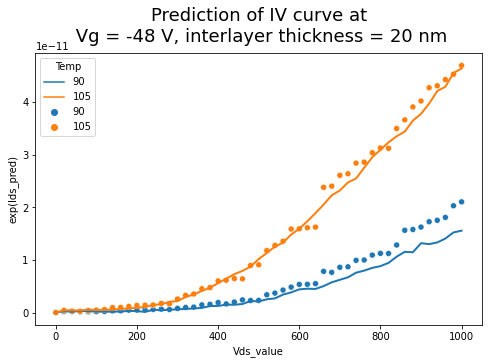

In [378]:
pred_graph(result, 20, -48)

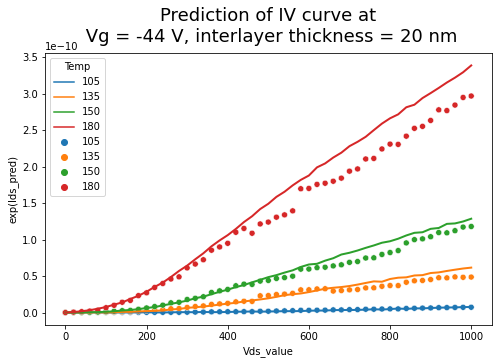

In [379]:
pred_graph(result, 20, -44)

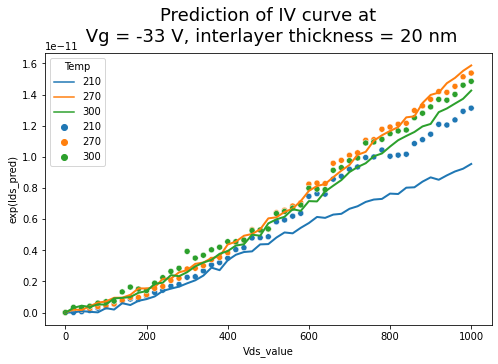

In [380]:
pred_graph(result, 20, -33)

In [381]:
condition = (result['thickness'] == 5)
for_graph = result[condition].copy()
for_graph['Vg'].unique()

array([-50, -49, -48, -47, -46, -45, -44, -43, -42, -40, -24, -22, -21,
       -20])

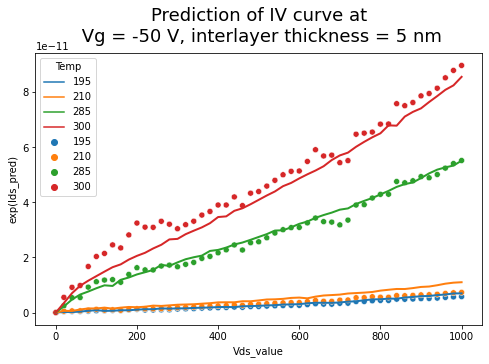

In [382]:
pred_graph(result, 5, -50)

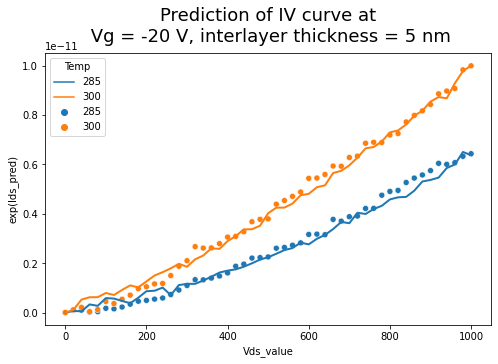

In [383]:
pred_graph(result, 5, -20)

In [384]:
condition = (result['thickness'] == 10)
for_graph = result[condition].copy()
for_graph['Vg'].unique()

array([-50, -48, -46, -44, -42, -40])

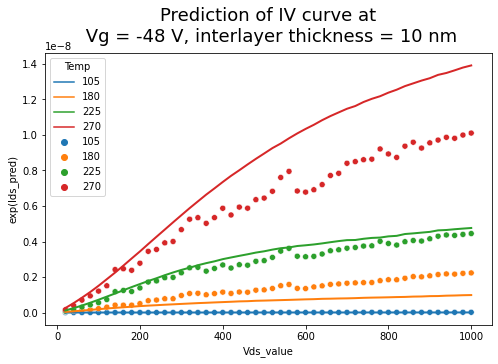

In [385]:
pred_graph(result, 10, -48)